Подключаем библиотеки, загружаем датасет


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import roc_curve, auc

df= pd.read_csv('adult.csv')
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


NaN нигде нет, но сразу видно ,что в некоторых столбцах есть '?'

Смотрю какие уникальные значения есть в столбцах типа object

In [3]:
print('workclass\n',df['workclass'].unique(),'\n')
print('education\n',df['education'].unique(),'\n')
print('marital.status\n',df['marital.status'].unique(),'\n')
print('occupation\n',df['occupation'].unique(),'\n')
print('relationship\n',df['relationship'].unique(),'\n')
print('race\n',df['race'].unique(),'\n')
print('sex\n',df['sex'].unique(),'\n')
print('native.country\n',df['native.country'].unique(),'\n')

workclass
 ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked'] 

education
 ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool'] 

marital.status
 ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse'] 

occupation
 ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] 

relationship
 ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife'] 

race
 ['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo'] 

sex
 ['Female' 'Male'] 

native.country
 ['United-States' '?' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippine

Видим, что workclass, occupation, native.country имеют '?'

Дропну все строки, имеющие это значение, но перед этим посмотрю % от общей массы для каждого столбца

In [4]:
df['workclass'].value_counts(normalize=True)*100

Private             69.703019
Self-emp-not-inc     7.803814
Local-gov            6.427935
?                    5.638647
State-gov            3.986364
Self-emp-inc         3.427413
Federal-gov          2.948312
Without-pay          0.042996
Never-worked         0.021498
Name: workclass, dtype: float64

In [5]:
df['occupation'].value_counts(normalize=True)*100

Prof-specialty       12.714597
Craft-repair         12.588680
Exec-managerial      12.487331
Adm-clerical         11.578268
Sales                11.209729
Other-service        10.119468
Machine-op-inspct     6.148460
?                     5.660146
Transport-moving      4.904641
Handlers-cleaners     4.207487
Farming-fishing       3.052732
Tech-support          2.850035
Protective-serv       1.993182
Priv-house-serv       0.457603
Armed-Forces          0.027640
Name: occupation, dtype: float64

In [6]:
df['native.country'].value_counts(normalize=True)*100

United-States                 89.585701
Mexico                         1.974755
?                              1.790486
Philippines                    0.608089
Germany                        0.420749
Canada                         0.371610
Puerto-Rico                    0.350112
El-Salvador                    0.325543
India                          0.307116
Cuba                           0.291760
England                        0.276404
Jamaica                        0.248764
South                          0.245693
China                          0.230337
Italy                          0.224195
Dominican-Republic             0.214981
Vietnam                        0.205768
Guatemala                      0.196554
Japan                          0.190412
Poland                         0.184270
Columbia                       0.181198
Taiwan                         0.156629
Haiti                          0.135131
Iran                           0.132060
Portugal                       0.113633


% минимальный, поэтому убираю все значения '?' во всех столбцах

p.s переименовал native.country, чтобы убрать точку

In [7]:
df = df.rename(columns = {'native.country':'native_country'})

In [8]:
df = df.drop(df[df.workclass == '?'].index)
df = df.drop(df[df.occupation == '?'].index)
df = df.drop(df[df.native_country == '?'].index)

Преобразовываю целевую переменную к типу int

In [9]:
df['income'] = df['income'].map({'>50K':1, '<=50K':0})

In [10]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native_country',
       'income'],
      dtype='object')

In [11]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native_country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0




Заметил корреляцию между education и education.num, решил посмотреть.

как оказалось, нет смысла в 2 столбцах, так как показывают одно и тоже, можно дропнуть один из столбцов.

Логичнее будет удалить education, так как education.num является числовым и с ним проще работать


In [12]:
pd.crosstab(df['education'],df['education.num'])

education.num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,820,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1048,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,377,0,0,0,0,0,0,0,0
1st-4th,0,151,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,288,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,557,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,455,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1008,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,1307,0,0,0,0,0


In [13]:
df.groupby('education')['education.num'].value_counts()

education     education.num
10th          6                 820
11th          7                1048
12th          8                 377
1st-4th       2                 151
5th-6th       3                 288
7th-8th       4                 557
9th           5                 455
Assoc-acdm    12               1008
Assoc-voc     11               1307
Bachelors     13               5044
Doctorate     16                375
HS-grad       9                9840
Masters       14               1627
Preschool     1                  45
Prof-school   15                542
Some-college  10               6678
Name: education.num, dtype: int64

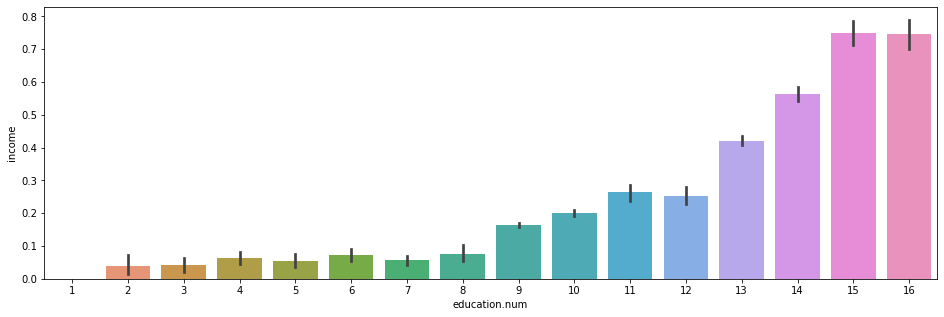

In [14]:
plt.figure(figsize=(16,5))
sns.barplot(x='education.num',y='income',data=df)
plt.show()

Видно, что в основном чем выше образование, тем чаще доход более 50К

In [15]:
df = df.drop(['education'], axis=1)

Учитывая огромное колличество уникальных значений стран, решил посмотреть, что с ними можно сделать.

Оказалось, что 89% из United-States, поэтому дропаю столбец, так как % остальных очень мал, чтобы оказывать серьезную зависимость на целевую переменную

In [16]:
df['native_country'].value_counts(normalize=True)

United-States                 0.911876
Mexico                        0.020224
Philippines                   0.006233
Germany                       0.004244
Puerto-Rico                   0.003614
Canada                        0.003548
El-Salvador                   0.003315
India                         0.003315
Cuba                          0.003050
England                       0.002851
Jamaica                       0.002652
South                         0.002354
China                         0.002254
Italy                         0.002254
Dominican-Republic            0.002221
Vietnam                       0.002122
Guatemala                     0.002089
Japan                         0.001956
Columbia                      0.001857
Poland                        0.001857
Iran                          0.001392
Taiwan                        0.001392
Haiti                         0.001392
Portugal                      0.001127
Nicaragua                     0.001094
Peru                     

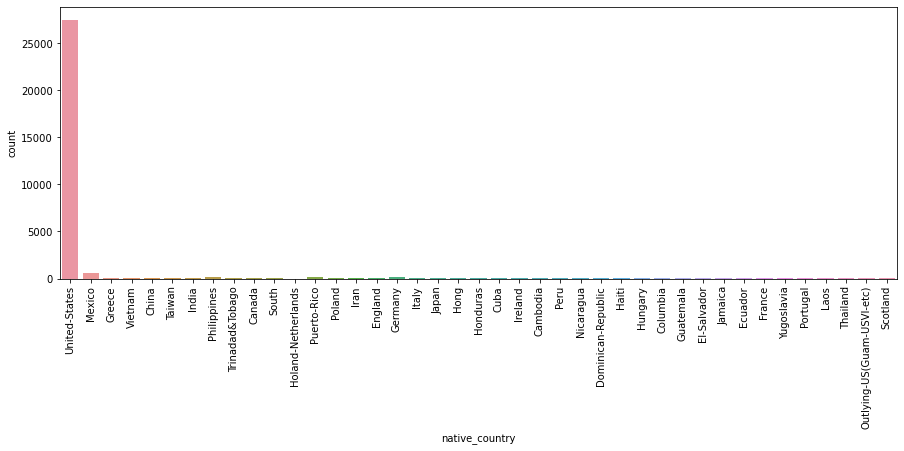

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(x='native_country',data=df)
plt.xticks(rotation=90)
plt.show()

In [18]:
df = df.drop(['native_country'], axis=1)

Вообще не понял логики  столба fnlwgt,

в описании на кагле есть пояснение по поводу этого столба,
что он берет расу пол и тд, 

но я так и не понял, что к чему

In [19]:
df.fnlwgt.sort_values(ascending=False)

16804    1484705
20027    1455435
18814    1366120
17793    1268339
11415    1226583
          ...   
3972       19302
13658      19214
25156      18827
26634      14878
27908      13769
Name: fnlwgt, Length: 30162, dtype: int64

In [20]:
df.fnlwgt.nunique()

20263

In [21]:
df = df.drop(['fnlwgt'], axis=1)

In [22]:
df.groupby('relationship')['marital.status'].value_counts()

relationship    marital.status       
Husband         Married-civ-spouse       12454
                Married-AF-spouse            9
Not-in-family   Never-married             4448
                Divorced                  2268
                Widowed                    432
                Separated                  383
                Married-spouse-absent      181
                Married-civ-spouse          14
Other-relative  Never-married              548
                Married-civ-spouse         118
                Divorced                   103
                Separated                   53
                Widowed                     40
                Married-spouse-absent       26
                Married-AF-spouse            1
Own-child       Never-married             3929
                Divorced                   308
                Separated                   90
                Married-civ-spouse          83
                Married-spouse-absent       43
                Widowe

In [23]:
df['marital.status'].value_counts(normalize=True)

Married-civ-spouse       0.466315
Never-married            0.322459
Divorced                 0.139712
Separated                0.031132
Widowed                  0.027419
Married-spouse-absent    0.012267
Married-AF-spouse        0.000696
Name: marital.status, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


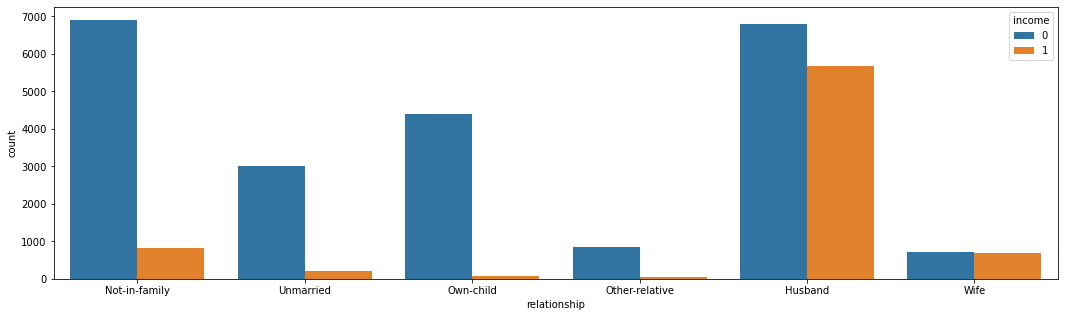

In [24]:
plt.figure(figsize=(18,5))
sns.countplot(df['relationship'], hue=df['income']);
plt.show()

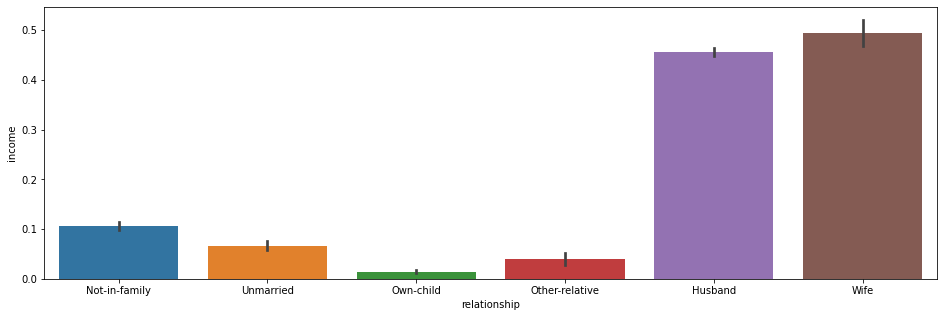

In [25]:
plt.figure(figsize=(16,5))
sns.barplot(x='relationship',y='income',data=df)
plt.show()

In [26]:
df['relationship'].value_counts(normalize=True)

Husband           0.413202
Not-in-family     0.256150
Own-child         0.148067
Unmarried         0.106492
Wife              0.046615
Other-relative    0.029474
Name: relationship, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


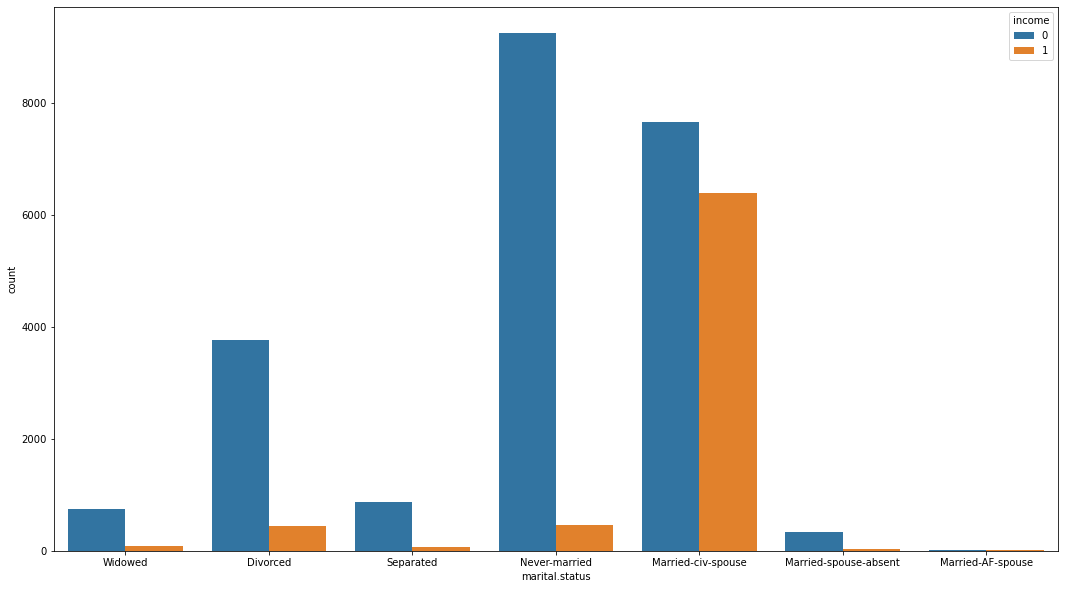

In [27]:
plt.figure(figsize=(18,10))
sns.countplot(df['marital.status'], hue=df['income']);
plt.show()

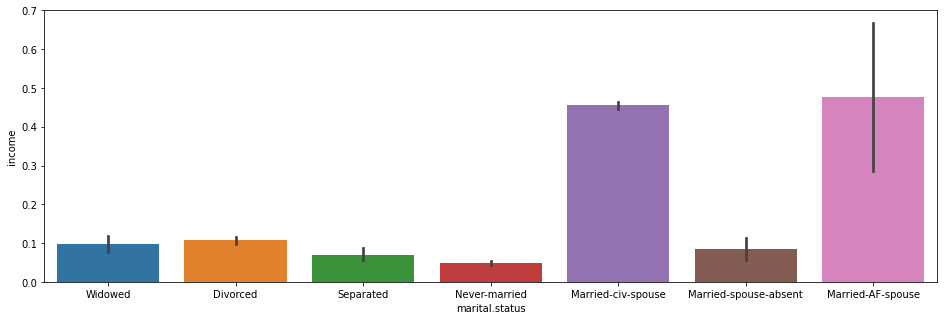

In [28]:
plt.figure(figsize=(16,5))
sns.barplot(x='marital.status',y='income',data=df)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


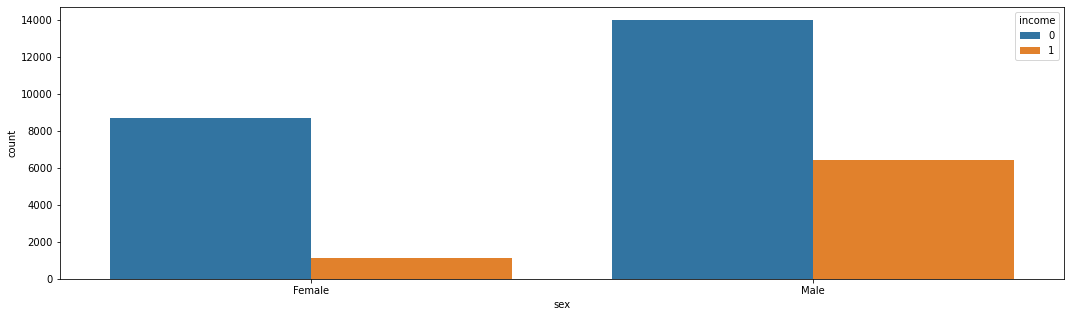

In [29]:
plt.figure(figsize=(18,5))
sns.countplot(df['sex'], hue=df['income']);
plt.show()

In [30]:
pd.crosstab(df['marital.status'],df['relationship'])

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
marital.status,,,,,,
Divorced,0,2268,103,308,1535,0
Married-AF-spouse,9,0,1,1,0,10
Married-civ-spouse,12454,14,118,83,0,1396
Married-spouse-absent,0,181,26,43,120,0
Never-married,0,4448,548,3929,801,0
Separated,0,383,53,90,413,0
Widowed,0,432,40,12,343,0


серия marital.status взаимосвязана с relationship, ее можно упростить, сократив значения до Женат/Не женат 


In [31]:
df['marital.status']=df['marital.status'].map({'Divorced':'Single',
                                               'Married-AF-spouse':'Married',
                                               'Married-civ-spouse':'Married',
                                               'Married-spouse-absent':'Married',
                                               'Never-married':'Single',
                                               'Separated':'Single',
                                               'Widowed':'Single'})


In [32]:
pd.crosstab(df['marital.status'],df['relationship'])

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
marital.status,,,,,,
Married,12463,195,145,127,120,1406
Single,0,7531,744,4339,3092,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


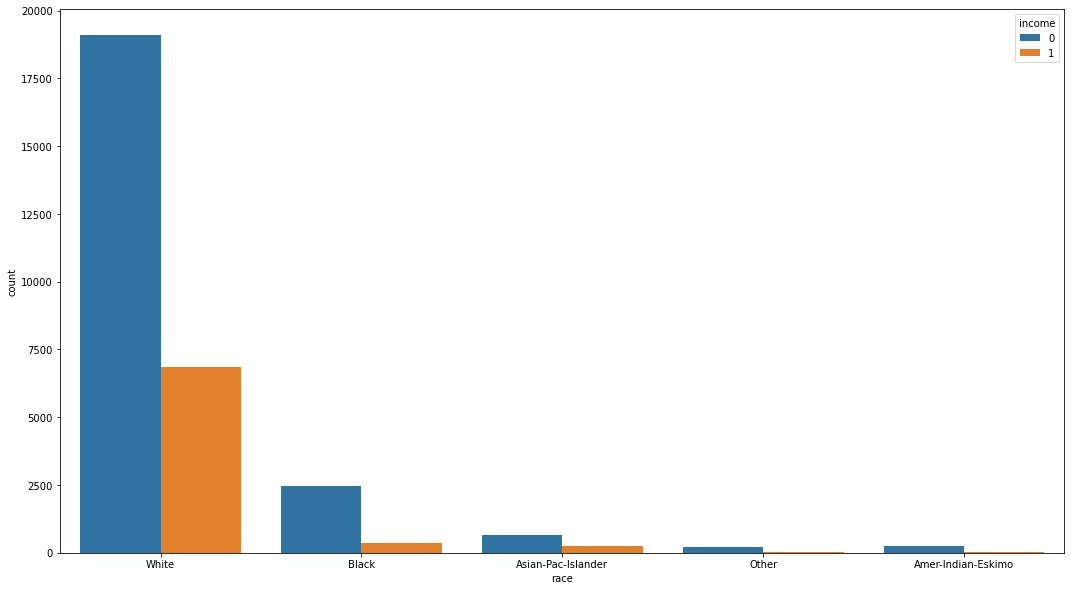

In [33]:
plt.figure(figsize=(18,10))
sns.countplot(df['race'], hue=df['income']);
plt.show()

In [34]:
df['race'].value_counts(normalize=True)*100

White                 85.979046
Black                  9.339566
Asian-Pac-Islander     2.967310
Amer-Indian-Eskimo     0.948213
Other                  0.765864
Name: race, dtype: float64

Думаю можно убрать все значения, кроме white, Black, Asian-Pac-Islander, слишком маленькое колличество

In [35]:
df= df.query("race not in ['Amer-Indian-Eskimo','Other']")

In [36]:
df['race'].value_counts(normalize=True)*100

White                 87.478496
Black                  9.502446
Asian-Pac-Islander     3.019059
Name: race, dtype: float64

In [37]:
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
1,82,Private,9,Single,Exec-managerial,Not-in-family,White,Female,0,4356,18,0
3,54,Private,4,Single,Machine-op-inspct,Unmarried,White,Female,0,3900,40,0
4,41,Private,10,Single,Prof-specialty,Own-child,White,Female,0,3900,40,0
5,34,Private,9,Single,Other-service,Unmarried,White,Female,0,3770,45,0
6,38,Private,6,Single,Adm-clerical,Unmarried,White,Male,0,3770,40,0


In [38]:
df = df.rename(columns = {'capital.gain':'capital_gain'})
df = df.rename(columns = {'capital.loss':'capital_loss'})

In [39]:
df[['capital_gain','capital_loss']].query('capital_gain > 100 and capital_loss < 99')
#df[['capital_gain','capital_loss']].query('capital_gain < 1').value_counts()

,capital_gain,capital_loss
1519,99999,0
1520,99999,0
1521,99999,0
1522,99999,0
1523,99999,0
...,...,...
4226,114,0
4227,114,0
4228,114,0
4229,114,0


Если немного поиграть с query и посмотреть на результаты, становится понятно ,что одна переменная зависит от другой. Если gain>0, то loss<gain и наоборот.

Следовательно можно дропнуть 2 эти столбца, сделав столбец capital_change, который передает разницу между этими сериями

In [40]:
df['capital_change']=df.capital_gain-df.capital_loss

In [41]:
df= df.drop(['capital_gain','capital_loss'], axis = 1)

In [42]:
df.head(10)

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,income,capital_change
1,82,Private,9,Single,Exec-managerial,Not-in-family,White,Female,18,0,-4356
3,54,Private,4,Single,Machine-op-inspct,Unmarried,White,Female,40,0,-3900
4,41,Private,10,Single,Prof-specialty,Own-child,White,Female,40,0,-3900
5,34,Private,9,Single,Other-service,Unmarried,White,Female,45,0,-3770
6,38,Private,6,Single,Adm-clerical,Unmarried,White,Male,40,0,-3770
7,74,State-gov,16,Single,Prof-specialty,Other-relative,White,Female,20,1,-3683
8,68,Federal-gov,9,Single,Prof-specialty,Not-in-family,White,Female,40,0,-3683
10,45,Private,16,Single,Prof-specialty,Unmarried,Black,Female,35,1,-3004
11,38,Self-emp-not-inc,15,Single,Prof-specialty,Not-in-family,White,Male,45,1,-2824
12,52,Private,13,Single,Other-service,Not-in-family,White,Female,20,1,-2824


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


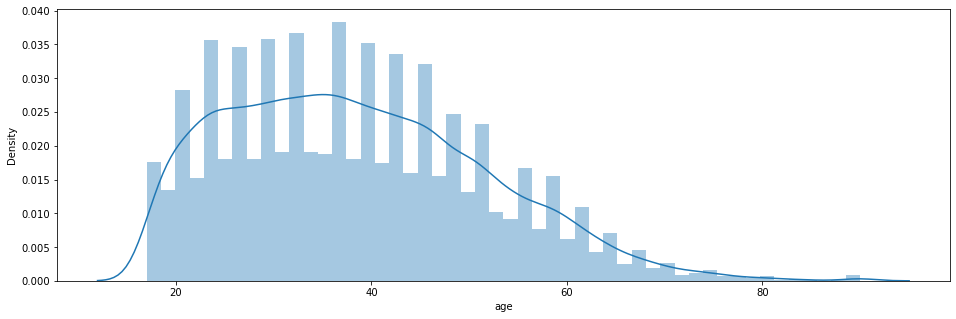

In [43]:
plt.figure(figsize=(16,5))
sns.distplot(df['age']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


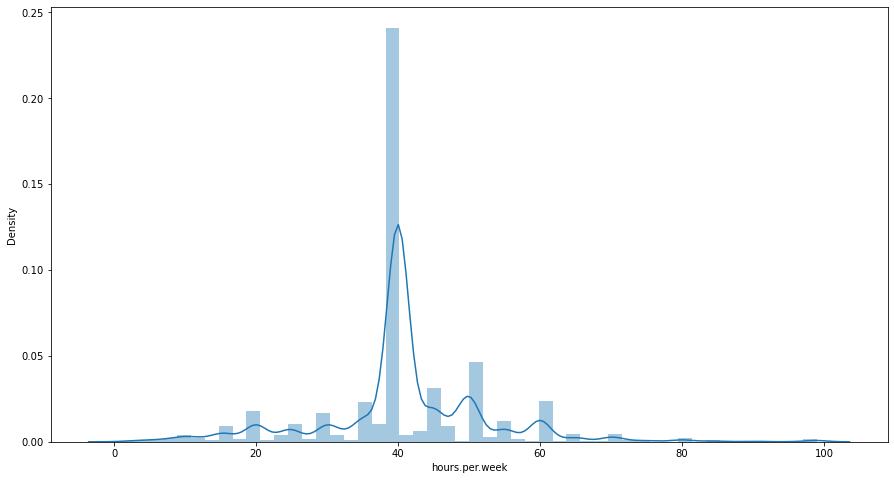

In [44]:
plt.figure(figsize=(15,8))
sns.distplot(df['hours.per.week']);

Видно, что большая часть работает ~40 часов в неделю

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


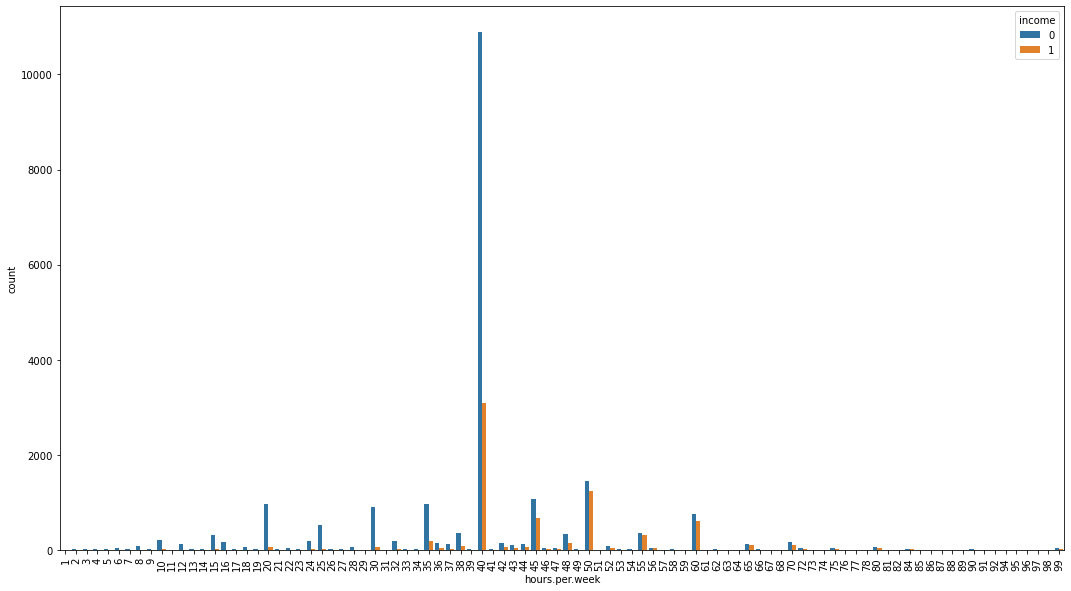

In [45]:
plt.figure(figsize=(18,10))
sns.countplot(df['hours.per.week'], hue=df['income']);
plt.xticks(rotation=90)
plt.show()

In [46]:
df = df.rename(columns = {'hours.per.week':'hours_per_week'})
df_week = df.query('hours_per_week>60')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


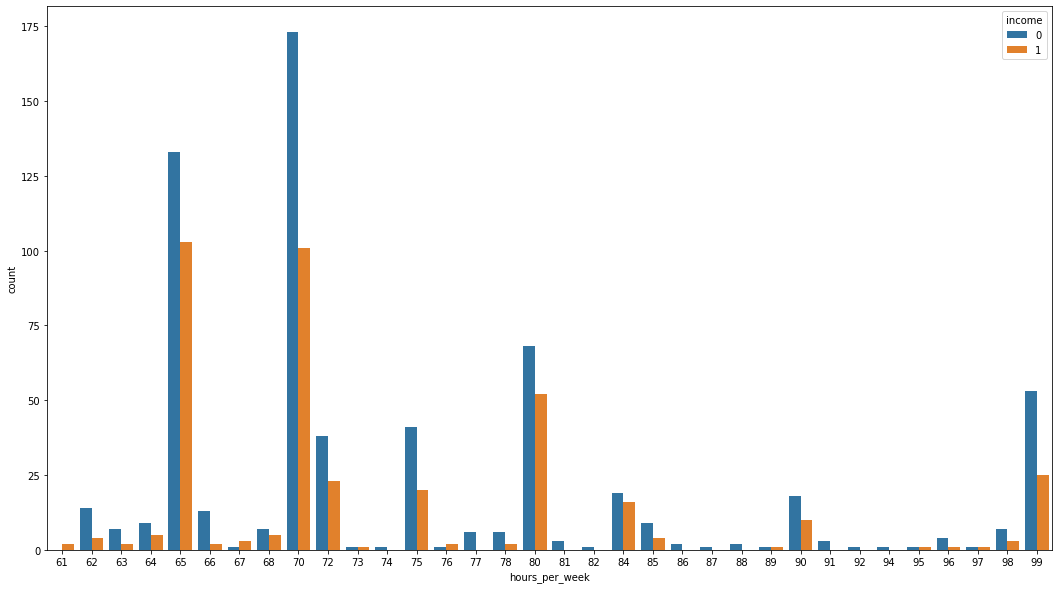

In [47]:
plt.figure(figsize=(18,10))
sns.countplot(df_week['hours_per_week'], hue=df['income']);
plt.show()

Хотел предположить, что работа в неделю более 99 часов(~14 часов в день, 7/0) это шумы, но в целом допускаю, что такое возможно

In [48]:
df_week_age = df.query('hours_per_week>80 and age>80')
df_week_age

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours_per_week,income,capital_change
17603,90,Private,9,Single,Transport-moving,Unmarried,White,Male,99,0,0


Не представляю, чтобы человек мог в 90 лет работать по 99 часов, но допустим это киборг

In [49]:
df = df.drop(df[(df.hours_per_week>80) & (df.age>80)].index)

In [50]:
df.head(10)

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours_per_week,income,capital_change
1,82,Private,9,Single,Exec-managerial,Not-in-family,White,Female,18,0,-4356
3,54,Private,4,Single,Machine-op-inspct,Unmarried,White,Female,40,0,-3900
4,41,Private,10,Single,Prof-specialty,Own-child,White,Female,40,0,-3900
5,34,Private,9,Single,Other-service,Unmarried,White,Female,45,0,-3770
6,38,Private,6,Single,Adm-clerical,Unmarried,White,Male,40,0,-3770
7,74,State-gov,16,Single,Prof-specialty,Other-relative,White,Female,20,1,-3683
8,68,Federal-gov,9,Single,Prof-specialty,Not-in-family,White,Female,40,0,-3683
10,45,Private,16,Single,Prof-specialty,Unmarried,Black,Female,35,1,-3004
11,38,Self-emp-not-inc,15,Single,Prof-specialty,Not-in-family,White,Male,45,1,-2824
12,52,Private,13,Single,Other-service,Not-in-family,White,Female,20,1,-2824


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='workclass', ylabel='count'>

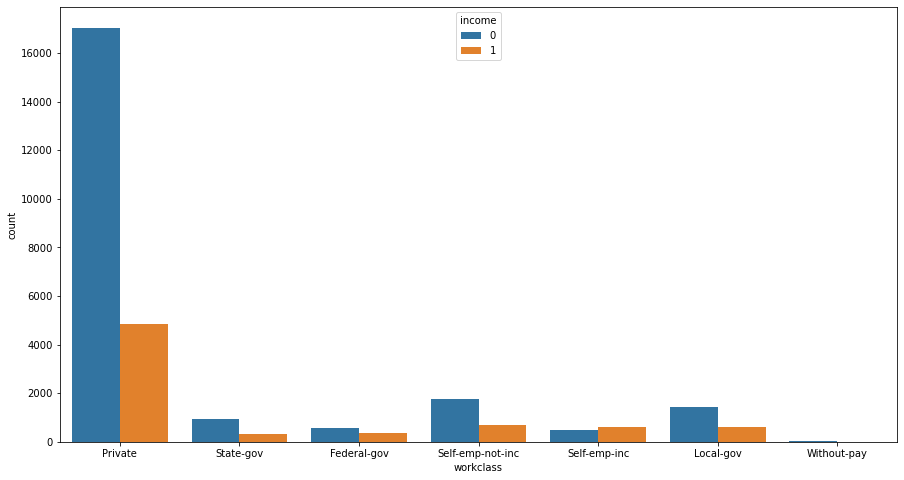

In [51]:
plt.figure(figsize=(15,8))
sns.countplot(df['workclass'], hue=df['income'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Exec-managerial'),
  Text(1, 0, 'Machine-op-inspct'),
  Text(2, 0, 'Prof-specialty'),
  Text(3, 0, 'Other-service'),
  Text(4, 0, 'Adm-clerical'),
  Text(5, 0, 'Transport-moving'),
  Text(6, 0, 'Sales'),
  Text(7, 0, 'Craft-repair'),
  Text(8, 0, 'Farming-fishing'),
  Text(9, 0, 'Tech-support'),
  Text(10, 0, 'Protective-serv'),
  Text(11, 0, 'Handlers-cleaners'),
  Text(12, 0, 'Armed-Forces'),
  Text(13, 0, 'Priv-house-serv')])

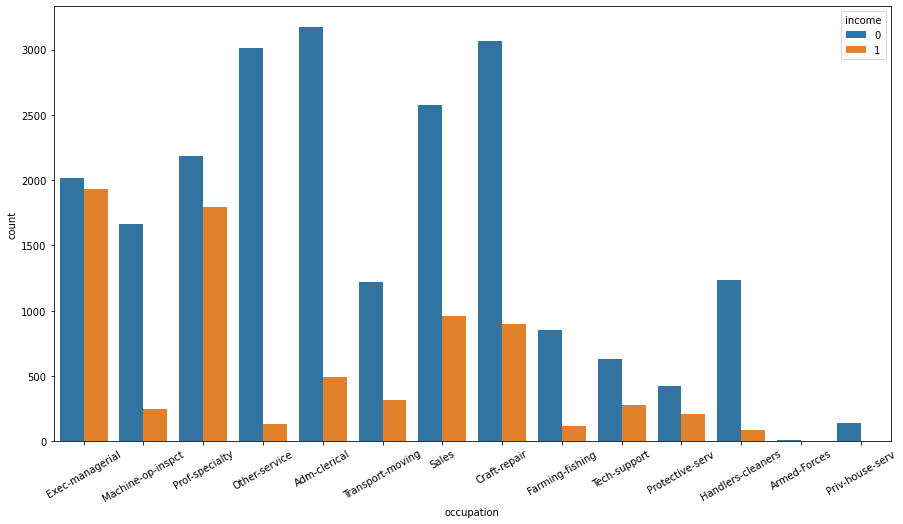

In [52]:
plt.figure(figsize=(15,8))
sns.countplot(df['occupation'], hue=df['income'])
plt.xticks(rotation=30)

Можно заметить, что Exec-managerial и Prof-specialty самые прибыльные типы занятости, так как почти половина получает прибыль больше 50К

In [53]:
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours_per_week,income,capital_change
1,82,Private,9,Single,Exec-managerial,Not-in-family,White,Female,18,0,-4356
3,54,Private,4,Single,Machine-op-inspct,Unmarried,White,Female,40,0,-3900
4,41,Private,10,Single,Prof-specialty,Own-child,White,Female,40,0,-3900
5,34,Private,9,Single,Other-service,Unmarried,White,Female,45,0,-3770
6,38,Private,6,Single,Adm-clerical,Unmarried,White,Male,40,0,-3770


In [54]:
df.shape

(29644, 11)

In [55]:
new_df = pd.get_dummies(data=df)

Делаем предпроцессинг переменных

In [56]:
new_df.columns

Index(['age', 'education.num', 'hours_per_week', 'income', 'capital_change',
       'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital.status_Married', 'marital.status_Single',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife',
       'race_Asian-Pac-Islander', 'race_Bla

In [57]:
new_df.shape

(29644, 39)

In [58]:
new_df = new_df.drop(['marital.status_Single','sex_Female'], axis=1)

In [59]:
new_df = new_df.rename(columns={'marital.status_Married':'Marital_status',
                       'sex_Male':'Sex'})

In [60]:
new_df.columns

Index(['age', 'education.num', 'hours_per_week', 'income', 'capital_change',
       'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'Marital_status',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife',
       'race_Asian-Pac-Islander', 'race_Black', 'race_White', 'Sex'],
      dtype='

In [61]:
new_df.shape

(29644, 37)

In [62]:

X = new_df.drop(['income'], axis=1)
y = new_df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [63]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22233, 36), (7411, 36), (22233,), (7411,))

Обучение модели

In [64]:
clf = RandomForestClassifier(random_state=42)
parametrs = {'n_estimators': range (10, 30, 10),
              'max_depth': range (1,12, 2),
              'min_samples_leaf': range (1,5),
              'min_samples_split': range (2,10,2)}
grid=GridSearchCV(clf, parametrs, cv=3, n_jobs=-1 )
grid.fit(X_train,y_train)
grid_score= grid.best_score_
grid_params=grid.best_params_

In [65]:
print(grid_score)
print(grid_params)

0.8540907659785004
{'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 20}


In [66]:
clf=RandomForestClassifier(max_depth= 11, min_samples_leaf = 2, min_samples_split = 8, n_estimators = 20)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

Итог

In [67]:
accuracy_score(y_test, prediction)

0.8552152206180003

In [68]:
roc_auc_score(y_test, prediction)

0.7559910878632923

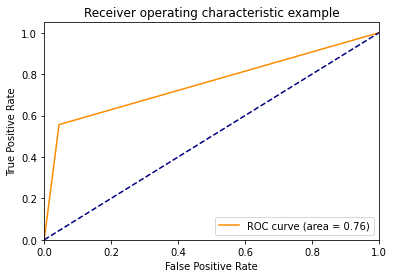

In [69]:
fpr, tpr, thresholds = roc_curve(y_test, prediction)
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()